In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news_dataset = pd.read_csv('/content/drive/MyDrive/DM&ML/Data set.csv')

In [ ]:
news_dataset.shape

(7202, 9)

In [ ]:
news_dataset.head(5)

,articleID,domain,date,category,source,relation,headline,content,label
0,1.0,bd-pratidin.com,9/20/2018 8:16,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,2.0,jugantor.com,9/20/2018 20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,0.0
2,3.0,bd24live.com,9/20/2018 16:39,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0
3,4.0,bd24live.com,9/19/2018 18:27,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0
4,5.0,somoynews.tv,9/20/2018 10:15,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,0.0


In [ ]:
news_dataset.isnull().sum()

articleID    2175
domain       2175
date         2175
category     2175
source       2175
relation     2175
headline     2175
content      2184
label        2175
dtype: int64

In [ ]:
news_dataset = news_dataset.dropna()

In [ ]:
news_dataset.isnull().sum()

articleID    0
domain       0
date         0
category     0
source       0
relation     0
headline     0
content      0
label        0
dtype: int64

In [ ]:
news_dataset.shape

(5018, 9)

In [ ]:
print("Total Reviews:",len(news_dataset),
      "\nTotal fake news:",len(news_dataset[news_dataset.label ==0]),
      "\nTotal Authentic news:",len(news_dataset[news_dataset.label ==1]),
      "\nTotal  semi fake news:",len(news_dataset[news_dataset.label ==2]))

Total Reviews: 5018 
Total fake news: 2788 
Total Authentic news: 1965 
Total  semi fake news: 265


Text(0.5, 1.1, 'Dataset Distribution')

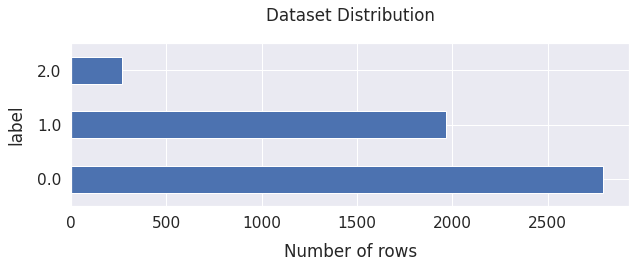

In [ ]:
sns.set(font_scale=1.4)
news_dataset['label'].value_counts().plot(kind='barh', figsize=(10,3))
plt.xlabel("Number of rows",labelpad=12)
plt.ylabel("label",labelpad=12)
plt.title("Dataset Distribution",y=1.10)

In [ ]:
news_dataset['content1'] = news_dataset['headline']+' '+news_dataset['content']

In [ ]:
print(news_dataset['content1'])

0       হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1       টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...
2       রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...
3       উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4       'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...
                              ...                        
5022    চাকরিতে প্রবেশের বয়সসীমা ৩৫ বছরে উন্নীতের সুপা...
5023    দলীয় ১শ’ রানে মিরাজের বিদায় আফগানিস্তানের দেয়া...
5024    বরিশালে জাল দলিলসহ চার প্রতারক আটক বরিশাল: বরি...
5025    ধরা পড়েছেন সেই ঠগি ধীরে ধীরে পর্দা খুলছেন আমির...
5026    উচাখিলা কলেজের নির্বাচন স্থগিত ইংরেজিতে ভোটার ...
Name: content1, Length: 5018, dtype: object


In [ ]:
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

      articleID  ...                                           content1
0           1.0  ...  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1           2.0  ...  টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...
2           3.0  ...  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...
3           4.0  ...  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4           5.0  ...  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...
...         ...  ...                                                ...
5022     5489.0  ...  চাকরিতে প্রবেশের বয়সসীমা ৩৫ বছরে উন্নীতের সুপা...
5023     5490.0  ...  দলীয় ১শ’ রানে মিরাজের বিদায় আফগানিস্তানের দেয়া...
5024     5491.0  ...  বরিশালে জাল দলিলসহ চার প্রতারক আটক বরিশাল: বরি...
5025     5492.0  ...  ধরা পড়েছেন সেই ঠগি ধীরে ধীরে পর্দা খুলছেন আমির...
5026     5493.0  ...  উচাখিলা কলেজের নির্বাচন স্থগিত ইংরেজিতে ভোটার ...

[5018 rows x 9 columns]
0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
5022    0.0
5023    0.0
5024    1.0
502

In [ ]:
def process_content1(content1):
   content1=re.sub('[^\u0980-\u09FF]',' ',str(content1)) #removing unnecessary punctuation and special character
   return content1

In [ ]:
news_dataset['cleaned']=news_dataset['content1'].apply(process_content1)

sample_data=[0,1,100,102,128,1005,4002,2004,3005,5001]
for i in sample_data:
           print('Original:\n',news_dataset.content1[i],'\nCleaned:\n',
                 news_dataset.cleaned[i],'\n','Sentiment:---',news_dataset.label[i],'\n')

Original:
 হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়েক বছরে তাদের পারফরম্যান্স নজর কেড়েছে ক্রিকেট জগতের। এশিয়া কাপের ১৪তম আসরেও দারুণ ছন্দে আছে আফগান ক্রিকেটাররা। পাঁচবারের এশিয়া কাপ চ্যাম্পিয়ন শ্রীলঙ্কাকে হারিয়ে এরই মধ্যে সেরা চারে পৌঁছে গেছে তারা। তবে দলের এমন ভালো সময়ে হঠাৎ করেই পদত্যাগ করেন আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান আতিফ মাশাল। তবে হঠাৎ কী কারণে তার এই পদত্যাগ- এ নিয়ে ওঠা প্রশ্নের জবাব দিয়েছেন আতিফ। তিনি জানান, সরকারের অন্য একটি বিশেষ পদে তাকে নিয়োগ দেওয়ার কারণেই বোর্ডের দায়িত্ব থেকে অব্যাহতি। তার পরিবর্তে এসিবির দায়িত্ব নেবেন আফগান বোর্ডের সাবেক সহ সভাপতি আজিজ উল্লাহ ফজলে।   ২০১৭ সালের জানুয়ারিতে পাঁচ বছরের জন্য আতিফকে বোর্ড প্রধান নির্বাচন করা হলেও দায়িত্বের আড়াই বছরের মাথায় দায়িত্ব থেকে অব্যাহতি দিলেন তিনি। বিডি প্রতিদিন/ ওয়াসিফ 
Cleaned:
 হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান  কয়েক বছরে তাদের পারফরম্যান্স নজর কেড়েছে ক্রিকেট জগতের  এশিয়া কাপের ১৪তম আসরেও দারুণ ছন্দে আছে আফগান 

In [ ]:
X = news_dataset['content1'].values
Y = news_dataset['label'].values

In [ ]:
X

array(['হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়েক বছরে তাদের পারফরম্যান্স নজর কেড়েছে ক্রিকেট জগতের। এশিয়া কাপের ১৪তম আসরেও দারুণ ছন্দে আছে আফগান ক্রিকেটাররা। পাঁচবারের এশিয়া কাপ চ্যাম্পিয়ন শ্রীলঙ্কাকে হারিয়ে এরই মধ্যে সেরা চারে পৌঁছে গেছে তারা। তবে দলের এমন ভালো সময়ে হঠাৎ করেই পদত্যাগ করেন আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান আতিফ মাশাল। তবে হঠাৎ কী কারণে তার এই পদত্যাগ- এ নিয়ে ওঠা প্রশ্নের জবাব দিয়েছেন আতিফ। তিনি জানান, সরকারের অন্য একটি বিশেষ পদে তাকে নিয়োগ দেওয়ার কারণেই বোর্ডের দায়িত্ব থেকে অব্যাহতি। তার পরিবর্তে এসিবির দায়িত্ব নেবেন আফগান বোর্ডের সাবেক সহ সভাপতি আজিজ উল্লাহ ফজলে।\xa0\xa0 ২০১৭ সালের জানুয়ারিতে পাঁচ বছরের জন্য আতিফকে বোর্ড প্রধান নির্বাচন করা হলেও দায়িত্বের আড়াই বছরের মাথায় দায়িত্ব থেকে অব্যাহতি দিলেন তিনি। বিডি প্রতিদিন/ ওয়াসিফ',
       'টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে টস জিতে প্রথমে ব্যাট করার সিদ্ধান্ত নিয়েছেন আফগানিস্তান ক্রিকেট দলের অধিনায়ক আসগর আফগান। আবুধাবিতে খেলাটি অনুষ্ঠি

In [ ]:
Y

array([1., 0., 1., ..., 1., 1., 0.])

In [ ]:
Y=Y.astype('int')

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 8392)	0.10947037613714204
  (0, 7964)	0.15019760106117613
  (0, 7615)	0.05395746278128046
  (0, 7456)	0.0483910140614749
  (0, 7394)	0.10029650977583458
  (0, 7390)	0.31772671157524845
  (0, 7284)	0.0592779322155423
  (0, 7238)	0.05820525427401076
  (0, 7221)	0.046917482789246595
  (0, 7183)	0.06587390157046913
  (0, 6599)	0.09919559892228838
  (0, 6455)	0.059129872531441224
  (0, 6440)	0.09666345406407512
  (0, 6364)	0.12767305069086224
  (0, 6320)	0.17777813614949145
  (0, 6266)	0.03540243883043915
  (0, 6236)	0.08212788596432019
  (0, 5791)	0.046975315906337634
  (0, 5459)	0.03625576367979991
  (0, 5339)	0.17816859384273384
  (0, 5202)	0.12845152467370946
  (0, 5194)	0.13400834405293374
  (0, 5111)	0.029741516755083894
  (0, 5063)	0.37095981715008225
  (0, 5053)	0.07628041296577291
  :	:
  (5017, 3136)	0.04089546966706869
  (5017, 2904)	0.13650950212137047
  (5017, 2877)	0.2798999007037128
  (5017, 2800)	0.08468783454812102
  (5017, 2765)	0.05261541506741529
  (5017, 2566)	0.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy : ', training_data_accuracy)

Accuracy :  0.7730637813211845


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
nh = DecisionTreeClassifier()
nh.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = nh.predict(X_test)

In [ ]:
nh.score(X_test, Y_test)

0.5571049136786188

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier (random_state=0)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(X_test)

In [ ]:
RFC.score(X_test, Y_test)

0.600265604249668